In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import cv2
import os

import numpy as np

In [2]:
cv2.imread("D:\\Hi-tech Work\\Image classification\\Classes\\classes2\\Train\\Top Wear\\5447809.jpg").shape

(800, 800, 3)

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [4]:
train_data=train.flow_from_directory('D:/Hi-tech Work/Image classification/Classes/classes2/Train',
                                        target_size=(300,300),
                                        batch_size=10,
                                        class_mode='binary')

validation_data=train.flow_from_directory('D:/Hi-tech Work/Image classification/Classes/classes2/Val',
                                        target_size=(300,300),
                                        batch_size=10,
                                        class_mode='binary')

Found 836 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [5]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


In [7]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(300,300,3)))
model.add(Activation('relu')) # Rectified Linear unit: piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])


In [10]:
model_fit=model.fit(train_data,steps_per_epoch=7,epochs=30,
                    validation_data=validation_data)

Epoch 1/30
7/7 [==============================] - 17s 2s/step - loss: 9.1091 - accuracy: 0.5714 - val_loss: 1.1578 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 15s 2s/step - loss: 0.7306 - accuracy: 0.6000 - val_loss: 0.4658 - val_accuracy: 0.8068
Epoch 3/30
7/7 [==============================] - 13s 2s/step - loss: 1.5048 - accuracy: 0.7000 - val_loss: 0.4335 - val_accuracy: 0.8068
Epoch 4/30
7/7 [==============================] - 14s 2s/step - loss: 0.3814 - accuracy: 0.8571 - val_loss: 0.3711 - val_accuracy: 0.9091
Epoch 5/30
7/7 [==============================] - 12s 2s/step - loss: 0.6118 - accuracy: 0.7121 - val_loss: 0.4492 - val_accuracy: 0.7045
Epoch 6/30
7/7 [==============================] - 13s 2s/step - loss: 0.4704 - accuracy: 0.8714 - val_loss: 0.2596 - val_accuracy: 0.9318
Epoch 7/30
7/7 [==============================] - 14s 2s/step - loss: 0.6150 - accuracy: 0.8429 - val_loss: 0.2982 - val_accuracy: 0.9091
Epoch 8/30
7/7 [==================

In [13]:
from tensorflow.keras.preprocessing import image

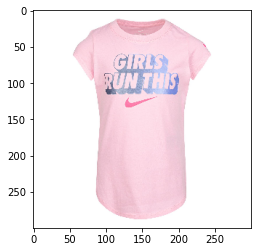

Top Wear


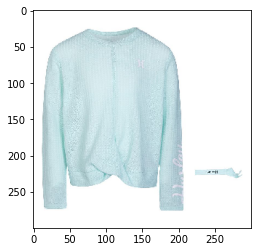

Top Wear


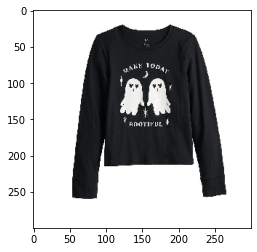

Top Wear


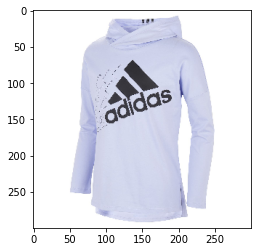

Top Wear


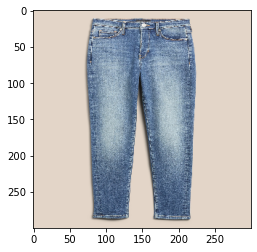

Bottom Wear


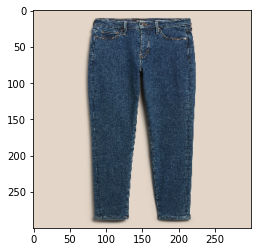

Bottom Wear


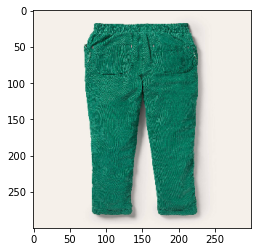

Bottom Wear


In [15]:
dir_path='D:\Hi-tech Work\Image classification\Classes\classes2\Test'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(300,300,3))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val == 0:
        print('Bottom Wear')
    else:
        print('Top Wear')
